In [1]:
import sys
sys.executable


'/home/shobhitraj/githubrepo/LaunchPad/.venv/bin/python'

In [2]:
import pandas as pd

df = pd.read_csv("../data/processed/final.csv")
df.head()


,patient_age,gender,bp_systolic,bp_diastolic,blood_urea,serum_creatinine,albumin,blood_glucose_random,diabetes,hypertension,...,bioavailability_pct,volume_of_distribution,kidney_cell_viability_pct,mitochondrial_damage,oxidative_stress,protein_binding_pct,serum_creatinine_change_pct,toxicity_score_composite,pk_toxic_interaction_score,ckd_risk_label
0,69,Male,136.5,90.4,45.3,1.42,2,175.2,0,1,...,53.69,1.49,63.2,0.54,0.30,96.2,34.88,1.66,0.29,2
1,32,Male,125.0,62.6,22.4,0.66,0,138.0,0,0,...,82.06,0.92,41.2,0.69,0.80,85.5,5.44,1.47,0.25,0
2,89,Female,124.2,71.1,36.0,1.72,0,177.2,0,0,...,35.96,0.51,80.2,0.89,0.54,53.3,35.12,1.79,0.35,1
3,78,Male,98.7,81.6,4.7,0.34,0,121.6,0,0,...,51.07,1.38,51.8,0.89,0.17,70.4,24.03,1.61,0.71,0
4,38,Male,147.7,81.4,56.6,1.39,0,65.4,0,1,...,59.58,1.40,27.9,0.47,0.25,29.7,24.84,1.70,0.38,2


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_age                  1345 non-null   int64  
 1   gender                       1345 non-null   object 
 2   bp_systolic                  1345 non-null   float64
 3   bp_diastolic                 1345 non-null   float64
 4   blood_urea                   1345 non-null   float64
 5   serum_creatinine             1345 non-null   float64
 6   albumin                      1345 non-null   int64  
 7   blood_glucose_random         1345 non-null   float64
 8   diabetes                     1345 non-null   int64  
 9   hypertension                 1345 non-null   int64  
 10  drug_name                    1345 non-null   object 
 11  drug_dosage_mg               1345 non-null   int64  
 12  exposure_days                1345 non-null   int64  
 13  nephrotoxic_label 

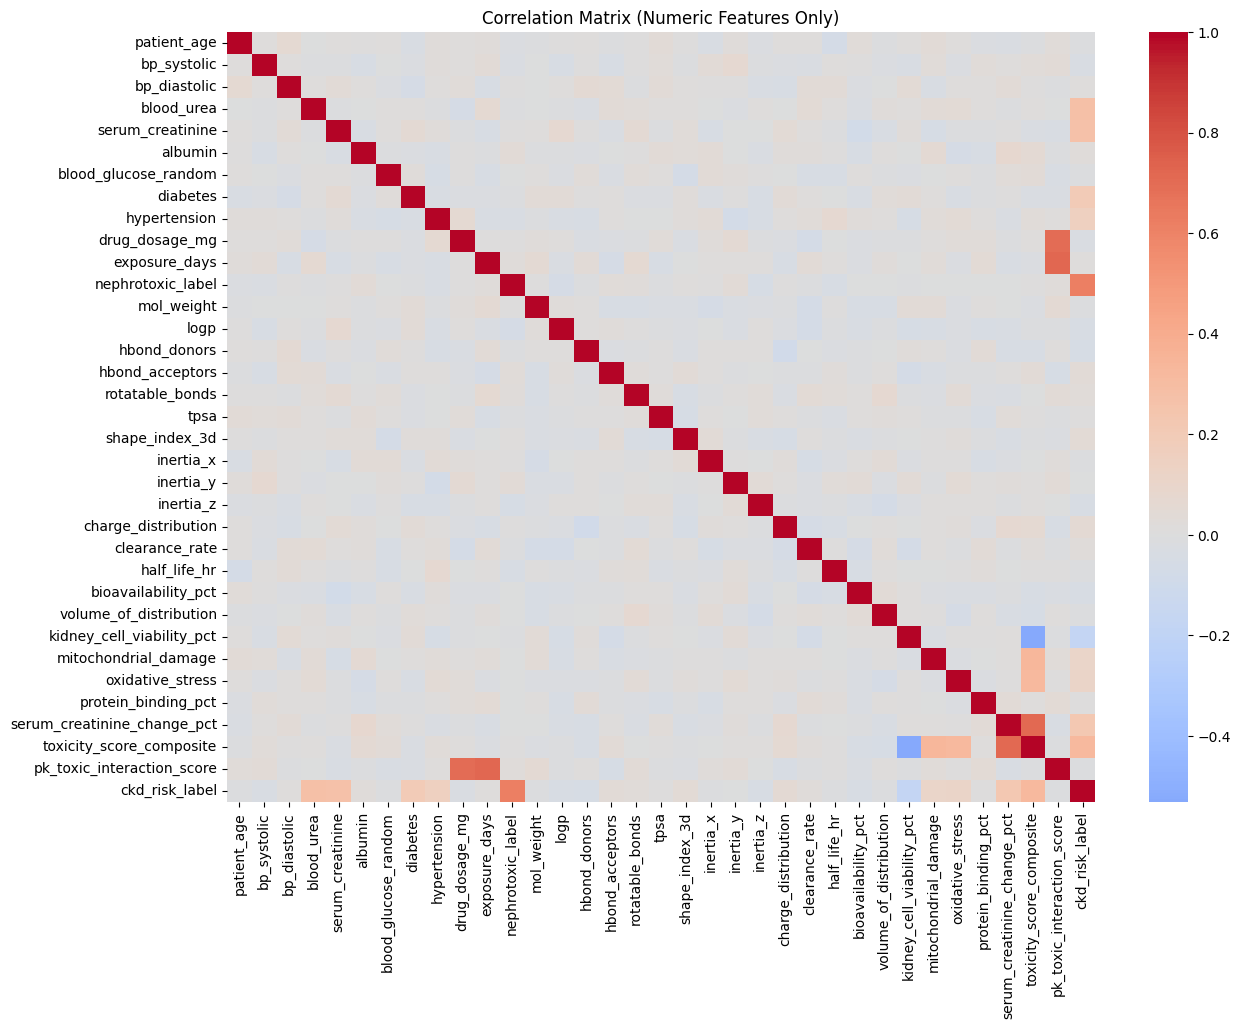

In [6]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, 10))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


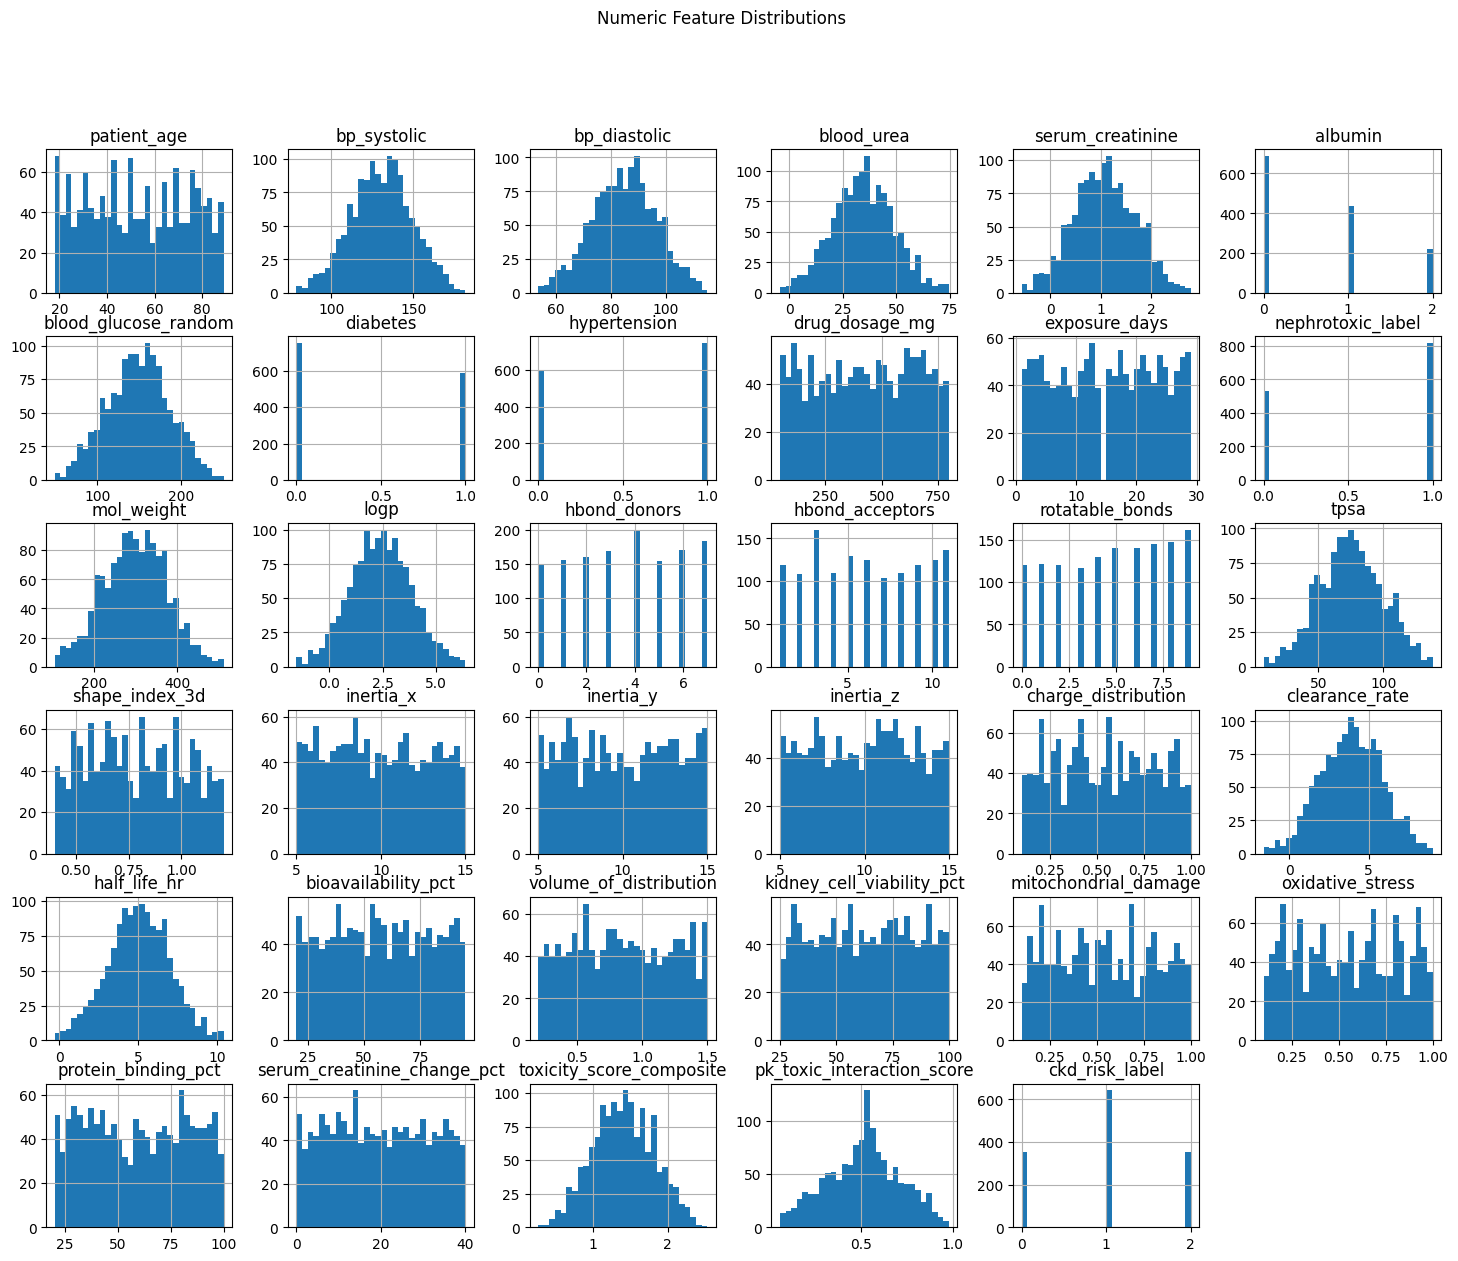

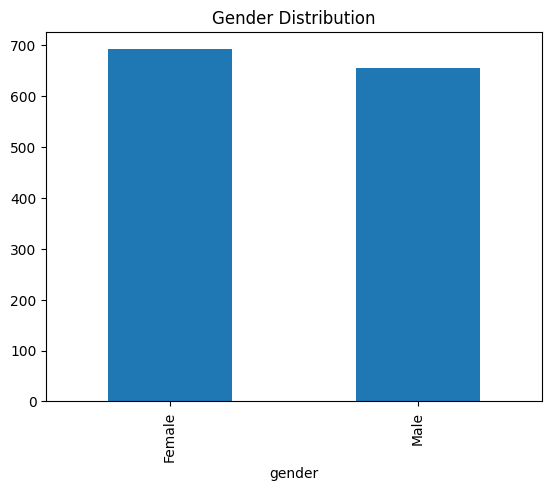

In [7]:
#Feature Distribution 
# Numeric
df[numeric_cols].hist(figsize=(18, 14), bins=30)
plt.suptitle("Numeric Feature Distributions")
plt.show()

# Categorical
df["gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.show()


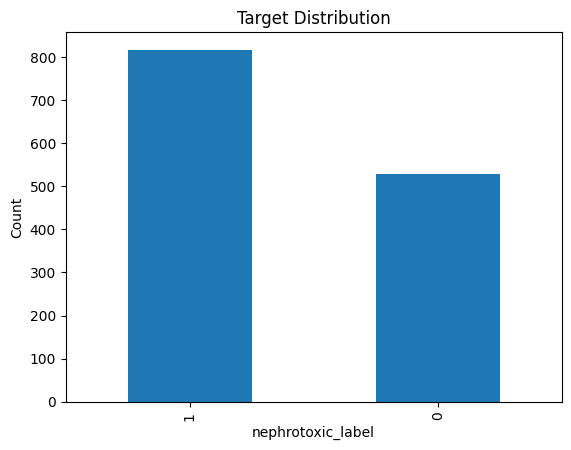

nephrotoxic_label
1    0.607435
0    0.392565
Name: proportion, dtype: float64

In [8]:
# Target Distribution
target_col = "nephrotoxic_label"

df[target_col].value_counts().plot(kind="bar")
plt.title("Target Distribution")
plt.ylabel("Count")
plt.show()

df[target_col].value_counts(normalize=True)


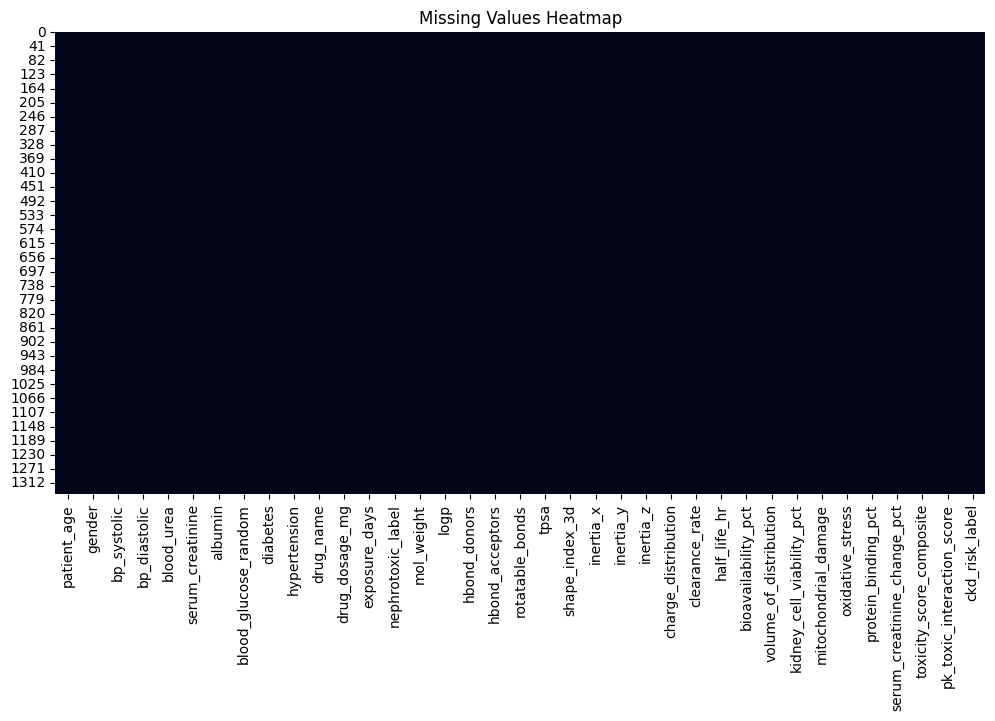

In [9]:
#Missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()
